## Calculate the novelty measure based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

> For a single person similarity score of a particular phase, we will get the compared similarity score of the other people in the previous phase. We will identify the one with the highest similarity score to the other person. The novelty measure is then 1 - the highest similarity score. For each design in a phase, the novelty measure. Novelty is a dependent variable in our model. 

In [1]:
%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase4_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', None)
phase12_bogota3 = df4[~(df4['user2'] == df4['user1'])]
stage1_bogota3 = phase12_bogota3.loc[(phase12_bogota3['user1_phase'] == 1) & (phase12_bogota3['user2_phase'] == 2)]
stage1_bogota3 


user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            1            2   
42             lemartinp           nfmorenog            1            2   
43             lemartinp           AFelipeGA            1            2   
44             lemartinp          mballeng91            1            2   
45             lemartinp            dduartec            1            2   
46             lemartinp           srmedinac            1            2   
47             lemartinp        wilson911013            1            2   
48             lemartinp       wapiravaguens            1            2   
49             lemartinp            davidh17            1            2   
50             lemartinp      DianaNavarrete            1            2   
51             lemartinp           jdmonroyg            1            2   
52             lemartinp           jorge52an            1            2   
53             lemartinp     jscastelblancoh            1            2   
54             lemartinp          juclopezso            1            2   
55             lemartinp           afforeroc            1            2   
56             lemartinp         dagofonseca            1            2   
57             lemartinp         lacardenasv            1            2   
58             lemartinp         oacastillol            1            2   
59             lemartinp          ncampuzano            1            2   
60             lemartinp            adriel62            1            2   
61             lemartinp            capinzor            1            2   
62             lemartinp            ofnanezn            1            2   
63             lemartinp           macuestap            1            2   
64             lemartinp              spenas            1            2   
65             lemartinp         kgbayala528            1            2   
66             lemartinp          lgmoralesa            1            2   
67             lemartinp          ronaldsg20            1            2   
68             lemartinp       cccristanchoc            1            2   
69             lemartinp          jmalvarezd            1            2   
70             lemartinp           smarquezo            1            2   
71             lemartinp             sarizag            1            2   
72             lemartinp            Chranium            1            2   
73             lemartinp             DavidQP            1            2   
74             lemartinp         afceballosr            1            2   
75             lemartinp           lizzyt10h            1            2   
76             lemartinp          NicolasPrr            1            2   
77             lemartinp       jumcorredorro            1            2   
78             lemartinp          feartheGru            1            2   
79             lemartinp        Danielsv9207            1            2   
80             lemartinp  JhonEmmanuelTorres            1            2   
120            juligarji           lemartinp            1            2   
122            juligarji           nfmorenog            1            2   
123            juligarji           AFelipeGA            1            2   
124            juligarji          mballeng91            1            2   
125            juligarji            dduartec            1            2   
126            juligarji           srmedinac            1            2   
127            juligarji        wilson911013            1            2   
128            juligarji       wapiravaguens            1            2   
129            juligarji            davidh17            1            2   
130            juligarji      DianaNavarrete            1            2   
131            juligarji           jdmonroyg            1            2   
132            juligarji           jorge52an            1            2   
133            juligarji     jscastelblancoh            1            2   
134            juligarj

In [3]:
stage1_bogota3_high_similarity = stage1_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            1            2   
1   JhonEmmanuelTorres          feartheGru            1            2   
2   JhonEmmanuelTorres           jdmonroyg            1            2   
3         Danielsv9207  JhonEmmanuelTorres            1            2   
4              DavidQP            capinzor            1            2   
5             ofnanezn           srmedinac            1            2   
6              DavidQP              spenas            1            2   
7            srmedinac            adriel62            1            2   
8           mballeng91          ronaldsg20            1            2   
9           ronaldsg20          mballeng91            1            2   
10            davidh17           macuestap            1            2   
11         oacastillol           afforeroc            1            2   
12            capinzor             DavidQP            1            2   
13            dduartec         dagofonseca            1            2   
14           smarquezo            Chranium            1            2   
15           srmedinac            davidh17            1            2   
16         afceballosr       jumcorredorro            1            2   
17            capinzor          lgmoralesa            1            2   
18             DavidQP       cccristanchoc            1            2   
19           smarquezo          juclopezso            1            2   
20       jumcorredorro            dduartec            1            2   
21            Chranium      DianaNavarrete            1            2   
22         dagofonseca          jmalvarezd            1            2   
23           nfmorenog           lemartinp            1            2   
24            davidh17             sarizag            1            2   
25            Chranium           smarquezo            1            2   
26       jumcorredorro         afceballosr            1            2   
27         oacastillol          NicolasPrr            1            2   
28         dagofonseca           nfmorenog            1            2   
29          juclopezso         lacardenasv            1            2   
30           afforeroc           lizzyt10h            1            2   
31           nfmorenog          ncampuzano            1            2   
32         lacardenasv            ofnanezn            1            2   
33          jmalvarezd       wapiravaguens            1            2   
34            davidh17     jscastelblancoh            1            2   
35           lizzyt10h         oacastillol            1            2   
36       jumcorredorro         kgbayala528            1            2   
37          jmalvarezd           jorge52an            1            2   
38          jmalvarezd           juligarji            1            2   
39           lizzyt10h           AFelipeGA            1            2   
40           AFelipeGA        wilson911013            1            2   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.600000  
5     0.575000  
6     0.555556  
7     0.555556  
8     0.477877  
9     0.477826  
10    0.454545  
11    0.454545  
12    0.416667  
13    0.407407  
14    0.400000  
15    0.383562  
16    0.375000  
17    0.369565  
18    0.351852  
19    0.333333  
20    0.333333  
21    0.333333  
22    0.303571  
23    0.291667  
24    0.285714  
25    0.285714  
26    0.280702  
27    0.260870  
28    0.254902  
29    0.253968  
30    0.250000  
31    0.244898  
32    0.223404  
33    0.202532  
34    0.190476  
35    0.169154  
36    0.151786  
37    0.074074  
38    0.057325  
39    0.014419  
40    0.010707

In [4]:
import matplotlib.pyplot as plt
phase23_bogota3 = df3[~(df3['user1'] == df3['user2'])]
stage2_bogota3 = phase23_bogota3.loc[(phase23_bogota3['user1_phase'] == 2) & (phase23_bogota3['user2_phase'] == 3)]
stage2_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            2            3   
42             lemartinp           nfmorenog            2            3   
43             lemartinp           AFelipeGA            2            3   
44             lemartinp          mballeng91            2            3   
45             lemartinp            dduartec            2            3   
46             lemartinp           srmedinac            2            3   
47             lemartinp        wilson911013            2            3   
48             lemartinp       wapiravaguens            2            3   
49             lemartinp            davidh17            2            3   
50             lemartinp      DianaNavarrete            2            3   
51             lemartinp           jdmonroyg            2            3   
52             lemartinp           jorge52an            2            3   
53             lemartinp     jscastelblancoh            2            3   
54             lemartinp          juclopezso            2            3   
55             lemartinp           afforeroc            2            3   
56             lemartinp         dagofonseca            2            3   
57             lemartinp         lacardenasv            2            3   
58             lemartinp         oacastillol            2            3   
59             lemartinp          ncampuzano            2            3   
60             lemartinp            adriel62            2            3   
61             lemartinp            capinzor            2            3   
62             lemartinp            ofnanezn            2            3   
63             lemartinp           macuestap            2            3   
64             lemartinp              spenas            2            3   
65             lemartinp         kgbayala528            2            3   
66             lemartinp          lgmoralesa            2            3   
67             lemartinp          ronaldsg20            2            3   
68             lemartinp       cccristanchoc            2            3   
69             lemartinp          jmalvarezd            2            3   
70             lemartinp           smarquezo            2            3   
71             lemartinp             sarizag            2            3   
72             lemartinp            Chranium            2            3   
73             lemartinp             DavidQP            2            3   
74             lemartinp         afceballosr            2            3   
75             lemartinp           lizzyt10h            2            3   
76             lemartinp          NicolasPrr            2            3   
77             lemartinp       jumcorredorro            2            3   
78             lemartinp          feartheGru            2            3   
79             lemartinp        Danielsv9207            2            3   
80             lemartinp  JhonEmmanuelTorres            2            3   
120            juligarji           lemartinp            2            3   
122            juligarji           nfmorenog            2            3   
123            juligarji           AFelipeGA            2            3   
124            juligarji          mballeng91            2            3   
125            juligarji            dduartec            2            3   
126            juligarji           srmedinac            2            3   
127            juligarji        wilson911013            2            3   
128            juligarji       wapiravaguens            2            3   
129            juligarji            davidh17            2            3   
130            juligarji      DianaNavarrete            2            3   
131            juligarji           jdmonroyg            2            3   
132            juligarji           jorge52an            2            3   
133            juligarji     jscastelblancoh            2            3   
134            juligarj

In [5]:
stage2_bogota3_high_similarity = stage2_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            2            3   
1   JhonEmmanuelTorres          feartheGru            2            3   
2   JhonEmmanuelTorres           jdmonroyg            2            3   
3         Danielsv9207  JhonEmmanuelTorres            2            3   
4            srmedinac            ofnanezn            2            3   
5             ofnanezn           srmedinac            2            3   
6             capinzor              spenas            2            3   
7             adriel62            capinzor            2            3   
8           ronaldsg20          mballeng91            2            3   
9           mballeng91          ronaldsg20            2            3   
10             DavidQP       cccristanchoc            2            3   
11            capinzor             DavidQP            2            3   
12         dagofonseca            adriel62            2            3   
13            Chranium      DianaNavarrete            2            3   
14      DianaNavarrete            Chranium            2            3   
15            Chranium           afforeroc            2            3   
16             DavidQP          lgmoralesa            2            3   
17             sarizag           macuestap            2            3   
18           macuestap             sarizag            2            3   
19           afforeroc          juclopezso            2            3   
20            Chranium           smarquezo            2            3   
21           lemartinp           lizzyt10h            2            3   
22       jumcorredorro            davidh17            2            3   
23           nfmorenog          jmalvarezd            2            3   
24          jmalvarezd           nfmorenog            2            3   
25           macuestap           lemartinp            2            3   
26       jumcorredorro         afceballosr            2            3   
27           afforeroc          NicolasPrr            2            3   
28           nfmorenog         kgbayala528            2            3   
29            davidh17       jumcorredorro            2            3   
30           lemartinp         lacardenasv            2            3   
31             sarizag     jscastelblancoh            2            3   
32       jumcorredorro         oacastillol            2            3   
33          jmalvarezd       wapiravaguens            2            3   
34       jumcorredorro            dduartec            2            3   
35           nfmorenog          ncampuzano            2            3   
36          jmalvarezd         dagofonseca            2            3   
37          ronaldsg20           juligarji            2            3   
38         lacardenasv           jorge52an            2            3   
39         kgbayala528           AFelipeGA            2            3   
40           srmedinac        wilson911013            2            3   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.666667  
5     0.575000  
6     0.555556  
7     0.500000  
8     0.477826  
9     0.477731  
10    0.448276  
11    0.363636  
12    0.340909  
13    0.333333  
14    0.333333  
15    0.333333  
16    0.323529  
17    0.323529  
18    0.323529  
19    0.300000  
20    0.285714  
21    0.280000  
22    0.262500  
23    0.259740  
24    0.253012  
25    0.240000  
26    0.238806  
27    0.227273  
28    0.179688  
29    0.179487  
30    0.166667  
31    0.161290  
32    0.153846  
33    0.152542  
34    0.142857  
35    0.123894  
36    0.082437  
37    0.057448  
38    0.038889  
39    0.013164  
40    0.009709

In [6]:
import matplotlib.pyplot as plt
phase34_bogota3 = df2[~(df2['user1'] == df2['user2'])]
stage3_bogota3 = phase34_bogota3.loc[(phase34_bogota3['user1_phase'] == 3) & (phase34_bogota3['user2_phase'] == 4)]
stage3_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            3            4   
42             lemartinp           nfmorenog            3            4   
43             lemartinp           AFelipeGA            3            4   
44             lemartinp          mballeng91            3            4   
45             lemartinp            dduartec            3            4   
46             lemartinp           srmedinac            3            4   
47             lemartinp        wilson911013            3            4   
48             lemartinp       wapiravaguens            3            4   
49             lemartinp            davidh17            3            4   
50             lemartinp      DianaNavarrete            3            4   
51             lemartinp           jdmonroyg            3            4   
52             lemartinp           jorge52an            3            4   
53             lemartinp     jscastelblancoh            3            4   
54             lemartinp          juclopezso            3            4   
55             lemartinp           afforeroc            3            4   
56             lemartinp         dagofonseca            3            4   
57             lemartinp         lacardenasv            3            4   
58             lemartinp         oacastillol            3            4   
59             lemartinp          ncampuzano            3            4   
60             lemartinp            adriel62            3            4   
61             lemartinp            capinzor            3            4   
62             lemartinp            ofnanezn            3            4   
63             lemartinp           macuestap            3            4   
64             lemartinp              spenas            3            4   
65             lemartinp         kgbayala528            3            4   
66             lemartinp          lgmoralesa            3            4   
67             lemartinp          ronaldsg20            3            4   
68             lemartinp       cccristanchoc            3            4   
69             lemartinp          jmalvarezd            3            4   
70             lemartinp           smarquezo            3            4   
71             lemartinp             sarizag            3            4   
72             lemartinp            Chranium            3            4   
73             lemartinp             DavidQP            3            4   
74             lemartinp         afceballosr            3            4   
75             lemartinp           lizzyt10h            3            4   
76             lemartinp          NicolasPrr            3            4   
77             lemartinp       jumcorredorro            3            4   
78             lemartinp          feartheGru            3            4   
79             lemartinp        Danielsv9207            3            4   
80             lemartinp  JhonEmmanuelTorres            3            4   
120            juligarji           lemartinp            3            4   
122            juligarji           nfmorenog            3            4   
123            juligarji           AFelipeGA            3            4   
124            juligarji          mballeng91            3            4   
125            juligarji            dduartec            3            4   
126            juligarji           srmedinac            3            4   
127            juligarji        wilson911013            3            4   
128            juligarji       wapiravaguens            3            4   
129            juligarji            davidh17            3            4   
130            juligarji      DianaNavarrete            3            4   
131            juligarji           jdmonroyg            3            4   
132            juligarji           jorge52an            3            4   
133            juligarji     jscastelblancoh            3            4   
134            juligarj

In [7]:
stage3_bogota3_high_similarity = stage3_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            3            4   
1            jdmonroyg  JhonEmmanuelTorres            3            4   
2            jdmonroyg          feartheGru            3            4   
3         Danielsv9207           jdmonroyg            3            4   
4          dagofonseca         oacastillol            3            4   
5             ofnanezn           srmedinac            3            4   
6            srmedinac            ofnanezn            3            4   
7           ronaldsg20          mballeng91            3            4   
8           mballeng91          ronaldsg20            3            4   
9              DavidQP              spenas            3            4   
10         dagofonseca          NicolasPrr            3            4   
11      DianaNavarrete            Chranium            3            4   
12            Chranium           afforeroc            3            4   
13            Chranium      DianaNavarrete            3            4   
14            capinzor          lgmoralesa            3            4   
15              spenas             DavidQP            3            4   
16             sarizag           macuestap            3            4   
17           macuestap             sarizag            3            4   
18           lemartinp           smarquezo            3            4   
19           lizzyt10h           lemartinp            3            4   
20         lacardenasv          juclopezso            3            4   
21            capinzor       cccristanchoc            3            4   
22           nfmorenog          jmalvarezd            3            4   
23          jmalvarezd           nfmorenog            3            4   
24           macuestap         afceballosr            3            4   
25           juligarji         lacardenasv            3            4   
26            adriel62            davidh17            3            4   
27         lacardenasv           lizzyt10h            3            4   
28           nfmorenog         kgbayala528            3            4   
29           nfmorenog          ncampuzano            3            4   
30          jmalvarezd       wapiravaguens            3            4   
31          jmalvarezd            dduartec            3            4   
32         oacastillol       jumcorredorro            3            4   
33       wapiravaguens     jscastelblancoh            3            4   
34          jmalvarezd         dagofonseca            3            4   
35          ronaldsg20           juligarji            3            4   
36       jumcorredorro           jorge52an            3            4   
37           juligarji            capinzor            3            4   
38           juligarji           AFelipeGA            3            4   
39           juligarji            adriel62            3            4   
40           srmedinac        wilson911013            3            4   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.733945  
5     0.676471  
6     0.666667  
7     0.477706  
8     0.477454  
9     0.347826  
10    0.342981  
11    0.333333  
12    0.333333  
13    0.333333  
14    0.320388  
15    0.320000  
16    0.314286  
17    0.305556  
18    0.285714  
19    0.264706  
20    0.262295  
21    0.254545  
22    0.247059  
23    0.247059  
24    0.222222  
25    0.205699  
26    0.205607  
27    0.187500  
28    0.176471  
29    0.150000  
30    0.140496  
31    0.135714  
32    0.114504  
33    0.092050  
34    0.087413  
35    0.057518  
36    0.044077  
37    0.030081  
38    0.028442  
39    0.023110  
40    0.012077

In [8]:
import matplotlib.pyplot as plt
phase45_bogota3 = df1[~(df1['user1'] == df1['user2'])]
stage4_bogota3 = phase45_bogota3.loc[(phase45_bogota3['user1_phase'] == 4) & (phase45_bogota3['user2_phase'] == 5)]
stage4_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            4            5   
42             lemartinp           nfmorenog            4            5   
43             lemartinp           AFelipeGA            4            5   
44             lemartinp          mballeng91            4            5   
45             lemartinp            dduartec            4            5   
46             lemartinp           srmedinac            4            5   
47             lemartinp        wilson911013            4            5   
48             lemartinp       wapiravaguens            4            5   
49             lemartinp            davidh17            4            5   
50             lemartinp      DianaNavarrete            4            5   
51             lemartinp           jdmonroyg            4            5   
52             lemartinp           jorge52an            4            5   
53             lemartinp     jscastelblancoh            4            5   
54             lemartinp          juclopezso            4            5   
55             lemartinp           afforeroc            4            5   
56             lemartinp         dagofonseca            4            5   
57             lemartinp         lacardenasv            4            5   
58             lemartinp         oacastillol            4            5   
59             lemartinp          ncampuzano            4            5   
60             lemartinp            adriel62            4            5   
61             lemartinp            capinzor            4            5   
62             lemartinp            ofnanezn            4            5   
63             lemartinp           macuestap            4            5   
64             lemartinp              spenas            4            5   
65             lemartinp         kgbayala528            4            5   
66             lemartinp          lgmoralesa            4            5   
67             lemartinp          ronaldsg20            4            5   
68             lemartinp       cccristanchoc            4            5   
69             lemartinp          jmalvarezd            4            5   
70             lemartinp           smarquezo            4            5   
71             lemartinp             sarizag            4            5   
72             lemartinp            Chranium            4            5   
73             lemartinp             DavidQP            4            5   
74             lemartinp         afceballosr            4            5   
75             lemartinp           lizzyt10h            4            5   
76             lemartinp          NicolasPrr            4            5   
77             lemartinp       jumcorredorro            4            5   
78             lemartinp          feartheGru            4            5   
79             lemartinp        Danielsv9207            4            5   
80             lemartinp  JhonEmmanuelTorres            4            5   
120            juligarji           lemartinp            4            5   
122            juligarji           nfmorenog            4            5   
123            juligarji           AFelipeGA            4            5   
124            juligarji          mballeng91            4            5   
125            juligarji            dduartec            4            5   
126            juligarji           srmedinac            4            5   
127            juligarji        wilson911013            4            5   
128            juligarji       wapiravaguens            4            5   
129            juligarji            davidh17            4            5   
130            juligarji      DianaNavarrete            4            5   
131            juligarji           jdmonroyg            4            5   
132            juligarji           jorge52an            4            5   
133            juligarji     jscastelblancoh            4            5   
134            juligarj

In [9]:
stage4_bogota3_high_similarity = stage4_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            4            5   
1   JhonEmmanuelTorres          feartheGru            4            5   
2         Danielsv9207  JhonEmmanuelTorres            4            5   
3          dagofonseca         oacastillol            4            5   
4          oacastillol         dagofonseca            4            5   
5            srmedinac            ofnanezn            4            5   
6             ofnanezn           srmedinac            4            5   
7           lgmoralesa           smarquezo            4            5   
8           mballeng91          ronaldsg20            4            5   
9           ronaldsg20          mballeng91            4            5   
10           afforeroc           jdmonroyg            4            5   
11           afforeroc            Chranium            4            5   
12            Chranium      DianaNavarrete            4            5   
13            Chranium           afforeroc            4            5   
14             DavidQP              spenas            4            5   
15             sarizag           macuestap            4            5   
16              spenas             DavidQP            4            5   
17           nfmorenog          jmalvarezd            4            5   
18          jmalvarezd           nfmorenog            4            5   
19           macuestap             sarizag            4            5   
20          lgmoralesa       cccristanchoc            4            5   
21       cccristanchoc          lgmoralesa            4            5   
22             sarizag           lemartinp            4            5   
23         lacardenasv           juligarji            4            5   
24           juligarji         lacardenasv            4            5   
25           macuestap         afceballosr            4            5   
26          jmalvarezd          NicolasPrr            4            5   
27          lgmoralesa            davidh17            4            5   
28         lacardenasv           AFelipeGA            4            5   
29           nfmorenog         kgbayala528            4            5   
30          jmalvarezd          juclopezso            4            5   
31           lemartinp           lizzyt10h            4            5   
32          jmalvarezd       wapiravaguens            4            5   
33       wapiravaguens          ncampuzano            4            5   
34         afceballosr       jumcorredorro            4            5   
35       jumcorredorro            adriel62            4            5   
36            davidh17     jscastelblancoh            4            5   
37     jscastelblancoh           jorge52an            4            5   
38          NicolasPrr            capinzor            4            5   
39           juligarji            dduartec            4            5   
40           srmedinac        wilson911013            4            5   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     0.731118  
4     0.704348  
5     0.676471  
6     0.676471  
7     0.500000  
8     0.477573  
9     0.477429  
10    0.400000  
11    0.333333  
12    0.333333  
13    0.333333  
14    0.320000  
15    0.297297  
16    0.253968  
17    0.250000  
18    0.247059  
19    0.239130  
20    0.216783  
21    0.214286  
22    0.212766  
23    0.205057  
24    0.204694  
25    0.204082  
26    0.183544  
27    0.182482  
28    0.178100  
29    0.176471  
30    0.166667  
31    0.147727  
32    0.144000  
33    0.121951  
34    0.111111  
35    0.093645  
36    0.093117  
37    0.046512  
38    0.035275  
39    0.030488  
40    0.012107

## Bogota 2 Pairwise Plots

In [10]:
import matplotlib.pyplot as plt
phase12_bogota2 = df4_bogota2[~(df4_bogota2['user1'] == df4_bogota2['user2'])]
stage1_bogota2 = phase12_bogota2.loc[(phase12_bogota2['user1_phase'] == 1) & (phase12_bogota2['user2_phase'] == 2)]
stage1_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            1            2    0.176471
42       jusherrerama       Phoenixest            1            2    0.166667
43       jusherrerama         HashNick            1            2    0.045455
44       jusherrerama          ccvacad            1            2    0.000000
45       jusherrerama       joaortizro            1            2    0.173913
46       jusherrerama  juasmartinezbel            1            2    0.035088
47       jusherrerama         mdbelloc            1            2    0.045455
48       jusherrerama      diegocruz10            1            2    0.131579
49       jusherrerama       crarojasca            1            2    0.000000
50       jusherrerama           sagilm            1            2    0.166667
51       jusherrerama         idrojasf            1            2    0.001639
52       jusherrerama     raulramirezp            1            2    0.036810
53       jusherrerama        fabianr23            1            2    0.066667
54       jusherrerama       jhriverasa            1            2    0.111111
55       jusherrerama       jhonsd1996            1            2    0.166667
56       jusherrerama       JuanitoAli            1            2    0.001737
57       jusherrerama       Davsatu313            1            2    0.042857
58       jusherrerama   cesarochoa2006            1            2    0.038961
59       jusherrerama        jjmuesesq            1            2    0.187500
60       jusherrerama     jucjimenezmo            1            2    0.136364
61       jusherrerama           kancas            1            2    0.074074
62       jusherrerama          Gantiva            1            2    0.060000
63       jusherrerama       Dandarprox            1            2    0.046875
64       jusherrerama       debeltranc            1            2    0.000000
65       jusherrerama        ykchautai            1            2    0.107143
66       jusherrerama        ligibrial            1            2    0.001320
67       jusherrerama       davidrh195            1            2    0.100000
68       jusherrerama      JulianaNino            1            2    0.281250
69       jusherrerama         luegilca            1            2    0.088889
70       jusherrerama           Yelis3            1            2    0.000111
71       jusherrerama        begarzonf            1            2    0.006928
72       jusherrerama       kmendezp96            1            2    0.037500
73       jusherrerama         leguzman            1            2    0.055556
74       jusherrerama     luealfonsoru            1            2    0.052632
75       jusherrerama         oserasoa            1            2    0.085106
76       jusherrerama         lsfinite            1            2    0.001237
77       jusherrerama        xdanielsb            1            2    0.020305
78       jusherrerama      CSebasGomez            1            2    0.000000
79       jusherrerama      jhcardenasa            1            2    0.000000
80       jusherrerama     jscontrerasp            1            2    0.085714
120           bdvegat     jusherrerama            1            2    0.176471
122           bdvegat       Phoenixest            1            2    0.500000
123           bdvegat         HashNick            1            2    0.055556
124           bdvegat          ccvacad            1            2    0.000000
125           bdvegat       joaortizro            1            2    0.250000
126           bdvegat  juasmartinezbel            1            2    0.029126
127           bdvegat         mdbelloc            1            2    0.055556
128           bdvegat      diegocruz10            1            2    0.107143
129           bdvegat       crarojasca            1            2    0.000000
130           bdvegat           sagilm            1            2    0.500000
131           bdvegat         idrojasf            1            2    0.000000
132         

In [11]:
stage1_bogota2_high_similarity = stage1_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).drop_duplicates(['user1']).reset_index(drop=True)
stage1_bogota2_high_similarity

user1         user2  user1_phase  user2_phase  similarity
0       jhcardenasa   CSebasGomez            1            2    1.000000
1       CSebasGomez    crarojasca            1            2    1.000000
2        crarojasca       ccvacad            1            2    1.000000
3      jucjimenezmo   jhcardenasa            1            2    1.000000
4            sagilm     jjmuesesq            1            2    1.000000
5         jjmuesesq       bdvegat            1            2    0.750000
6          HashNick      mdbelloc            1            2    0.696970
7          mdbelloc      HashNick            1            2    0.656250
8        JuanitoAli   JulianaNino            1            2    0.500000
9            kancas      luegilca            1            2    0.390244
10      diegocruz10    joaortizro            1            2    0.370370
11         luegilca    kmendezp96            1            2    0.351351
12          Gantiva     ykchautai            1            2    0.304348
13         oserasoa   diegocruz10            1            2    0.297297
14      JulianaNino  jusherrerama            1            2    0.285714
15       jhriverasa    davidrh195            1            2    0.200000
16           Yelis3      lsfinite            1            2    0.063120
17       kmendezp96     begarzonf            1            2    0.051836
18  juasmartinezbel     xdanielsb            1            2    0.045455
19         idrojasf     ligibrial            1            2    0.017106
20        xdanielsb    debeltranc            1            2    0.005464

In [12]:
import matplotlib.pyplot as plt
phase23_bogota2 = df3_bogota2[~(df3_bogota2['user1'] == df3_bogota2['user2'])]
stage2_bogota2 = phase23_bogota2.loc[(phase23_bogota2['user1_phase'] == 2) & (phase23_bogota2['user2_phase'] == 3)]
stage2_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            2            3    0.173913
42       jusherrerama       Phoenixest            2            3    0.166667
43       jusherrerama         HashNick            2            3    0.045455
44       jusherrerama          ccvacad            2            3    0.000000
45       jusherrerama       joaortizro            2            3    0.129032
46       jusherrerama  juasmartinezbel            2            3    0.026144
47       jusherrerama         mdbelloc            2            3    0.045455
48       jusherrerama      diegocruz10            2            3    0.098039
49       jusherrerama       crarojasca            2            3    0.000000
50       jusherrerama           sagilm            2            3    0.088235
51       jusherrerama         idrojasf            2            3    0.001639
52       jusherrerama     raulramirezp            2            3    0.036810
53       jusherrerama        fabianr23            2            3    0.043011
54       jusherrerama       jhriverasa            2            3    0.102564
55       jusherrerama       jhonsd1996            2            3    0.166667
56       jusherrerama       JuanitoAli            2            3    0.001286
57       jusherrerama       Davsatu313            2            3    0.063830
58       jusherrerama   cesarochoa2006            2            3    0.024390
59       jusherrerama        jjmuesesq            2            3    0.187500
60       jusherrerama     jucjimenezmo            2            3    0.136364
61       jusherrerama           kancas            2            3    0.074074
62       jusherrerama          Gantiva            2            3    0.051724
63       jusherrerama       Dandarprox            2            3    0.033333
64       jusherrerama       debeltranc            2            3    0.000000
65       jusherrerama        ykchautai            2            3    0.083333
66       jusherrerama        ligibrial            2            3    0.001757
67       jusherrerama       davidrh195            2            3    0.100000
68       jusherrerama      JulianaNino            2            3    0.219512
69       jusherrerama         luegilca            2            3    0.088889
70       jusherrerama           Yelis3            2            3    0.000135
71       jusherrerama        begarzonf            2            3    0.006742
72       jusherrerama       kmendezp96            2            3    0.035294
73       jusherrerama         leguzman            2            3    0.049505
74       jusherrerama     luealfonsoru            2            3    0.053763
75       jusherrerama         oserasoa            2            3    0.068966
76       jusherrerama         lsfinite            2            3    0.001232
77       jusherrerama        xdanielsb            2            3    0.019512
78       jusherrerama      CSebasGomez            2            3    0.000000
79       jusherrerama      jhcardenasa            2            3    0.000000
80       jusherrerama     jscontrerasp            2            3    0.073171
120           bdvegat     jusherrerama            2            3    0.001326
122           bdvegat       Phoenixest            2            3    0.500000
123           bdvegat         HashNick            2            3    0.055556
124           bdvegat          ccvacad            2            3    0.000000
125           bdvegat       joaortizro            2            3    0.150000
126           bdvegat  juasmartinezbel            2            3    0.021127
127           bdvegat         mdbelloc            2            3    0.055556
128           bdvegat      diegocruz10            2            3    0.073171
129           bdvegat       crarojasca            2            3    0.000000
130           bdvegat           sagilm            2            3    0.136364
131           bdvegat         idrojasf            2            3    0.000000
132         

In [13]:
stage2_bogota2_high_similarity = stage2_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0     crarojasca      CSebasGomez            2            3    1.000000
1        ccvacad      jhcardenasa            2            3    1.000000
2    jhcardenasa          ccvacad            2            3    1.000000
3    jhcardenasa       crarojasca            2            3    1.000000
4      ligibrial     jusherrerama            2            3    0.987687
5     JuanitoAli        ligibrial            2            3    0.976573
6      ligibrial       JuanitoAli            2            3    0.963551
7        bdvegat        jjmuesesq            2            3    0.750000
8       mdbelloc         HashNick            2            3    0.656250
9       HashNick         mdbelloc            2            3    0.656250
10     jjmuesesq       Phoenixest            2            3    0.600000
11     jjmuesesq       jhonsd1996            2            3    0.600000
12    joaortizro          bdvegat            2            3    0.571429
13      HashNick     luealfonsoru            2            3    0.569767
14      mdbelloc         leguzman            2            3    0.415842
15      HashNick         oserasoa            2            3    0.414286
16  jscontrerasp        ykchautai            2            3    0.406250
17      oserasoa           kancas            2            3    0.375000
18      oserasoa           sagilm            2            3    0.365854
19      oserasoa         luegilca            2            3    0.360000
20     ykchautai       joaortizro            2            3    0.360000
21      oserasoa       Davsatu313            2            3    0.352941
22      leguzman   cesarochoa2006            2            3    0.349206
23     jjmuesesq     jucjimenezmo            2            3    0.333333
24      luegilca       kmendezp96            2            3    0.329114
25    joaortizro      diegocruz10            2            3    0.243902
26      luegilca       Dandarprox            2            3    0.235955
27    joaortizro       jhriverasa            2            3    0.225806
28    jhonsd1996       davidrh195            2            3    0.222222
29  jusherrerama      JulianaNino            2            3    0.219512
30      leguzman  juasmartinezbel            2            3    0.218182
31       Gantiva     jscontrerasp            2            3    0.203704
32   diegocruz10          Gantiva            2            3    0.180328
33   diegocruz10        fabianr23            2            3    0.113402
34  luealfonsoru     raulramirezp            2            3    0.067568
35      leguzman        xdanielsb            2            3    0.067511
36        Yelis3         lsfinite            2            3    0.062102
37      lsfinite           Yelis3            2            3    0.060904
38    kmendezp96        begarzonf            2            3    0.057203
39  raulramirezp         idrojasf            2            3    0.041783
40     xdanielsb       debeltranc            2            3    0.009901

In [14]:
import matplotlib.pyplot as plt
phase34_bogota2 = df2_bogota2[~(df2_bogota2['user1'] == df2_bogota2['user2'])]
stage3_bogota2 = phase34_bogota2.loc[(phase34_bogota2['user1_phase'] == 3) & (phase34_bogota2['user2_phase'] == 4)]
stage3_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            3            4    0.003091
42       jusherrerama       Phoenixest            3            4    0.001326
43       jusherrerama         HashNick            3            4    0.005635
44       jusherrerama          ccvacad            3            4    0.003871
45       jusherrerama       joaortizro            3            4    0.002639
46       jusherrerama  juasmartinezbel            3            4    0.013575
47       jusherrerama         mdbelloc            3            4    0.004776
48       jusherrerama      diegocruz10            3            4    0.004803
49       jusherrerama       crarojasca            3            4    0.000000
50       jusherrerama           sagilm            3            4    0.002196
51       jusherrerama         idrojasf            3            4    0.017813
52       jusherrerama     raulramirezp            3            4    0.018616
53       jusherrerama        fabianr23            3            4    0.011580
54       jusherrerama       jhriverasa            3            4    0.003841
55       jusherrerama       jhonsd1996            3            4    0.001326
56       jusherrerama       JuanitoAli            3            4    0.939749
57       jusherrerama       Davsatu313            3            4    0.012053
58       jusherrerama   cesarochoa2006            3            4    0.013682
59       jusherrerama        jjmuesesq            3            4    0.002644
60       jusherrerama     jucjimenezmo            3            4    0.006944
61       jusherrerama           kancas            3            4    0.005677
62       jusherrerama          Gantiva            3            4    0.003472
63       jusherrerama       Dandarprox            3            4    0.009117
64       jusherrerama       debeltranc            3            4    0.000439
65       jusherrerama        ykchautai            3            4    0.001756
66       jusherrerama        ligibrial            3            4    0.985526
67       jusherrerama       davidrh195            3            4    0.001317
68       jusherrerama      JulianaNino            3            4    0.005277
69       jusherrerama         luegilca            3            4    0.003500
70       jusherrerama           Yelis3            3            4    0.010014
71       jusherrerama        begarzonf            3            4    0.010507
72       jusherrerama       kmendezp96            3            4    0.008565
73       jusherrerama         leguzman            3            4    0.013305
74       jusherrerama     luealfonsoru            3            4    0.006435
75       jusherrerama         oserasoa            3            4    0.006545
76       jusherrerama         lsfinite            3            4    0.023861
77       jusherrerama        xdanielsb            3            4    0.011784
78       jusherrerama      CSebasGomez            3            4    0.000000
79       jusherrerama      jhcardenasa            3            4    0.000000
80       jusherrerama     jscontrerasp            3            4    0.001751
120           bdvegat     jusherrerama            3            4    0.003091
122           bdvegat       Phoenixest            3            4    0.230769
123           bdvegat         HashNick            3            4    0.129032
124           bdvegat          ccvacad            3            4    0.090909
125           bdvegat       joaortizro            3            4    0.363636
126           bdvegat  juasmartinezbel            3            4    0.038835
127           bdvegat         mdbelloc            3            4    0.142857
128           bdvegat      diegocruz10            3            4    0.186047
129           bdvegat       crarojasca            3            4    0.000000
130           bdvegat           sagilm            3            4    0.103448
131           bdvegat         idrojasf            3            4    0.004967
132         

In [15]:
stage3_bogota2_high_similarity = stage3_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0      jhcardenasa       crarojasca            3            4    1.000000
1          ccvacad      CSebasGomez            3            4    1.000000
2       crarojasca      jhcardenasa            3            4    1.000000
3        ligibrial     jusherrerama            3            4    0.985959
4     jusherrerama        ligibrial            3            4    0.985526
5        ligibrial       JuanitoAli            3            4    0.942235
6         mdbelloc         HashNick            3            4    0.696970
7         HashNick         mdbelloc            3            4    0.656250
8        jjmuesesq       jhonsd1996            3            4    0.600000
9        jjmuesesq       Phoenixest            3            4    0.600000
10        mdbelloc     jucjimenezmo            3            4    0.555556
11        HashNick     luealfonsoru            3            4    0.550562
12        HashNick         oserasoa            3            4    0.414286
13        mdbelloc         leguzman            3            4    0.378378
14        oserasoa           sagilm            3            4    0.367347
15         bdvegat       joaortizro            3            4    0.363636
16      joaortizro          bdvegat            3            4    0.363636
17    jscontrerasp        ykchautai            3            4    0.361111
18       ykchautai     jscontrerasp            3            4    0.342105
19        oserasoa           kancas            3            4    0.333333
20      kmendezp96         luegilca            3            4    0.329114
21        leguzman       Davsatu313            3            4    0.313869
22        luegilca       kmendezp96            3            4    0.257426
23         bdvegat        jjmuesesq            3            4    0.250000
24        oserasoa          ccvacad            3            4    0.226804
25      joaortizro      JulianaNino            3            4    0.222222
26      joaortizro      diegocruz10            3            4    0.204082
27      jhonsd1996       davidrh195            3            4    0.190476
28        oserasoa          Gantiva            3            4    0.182927
29        leguzman  juasmartinezbel            3            4    0.176707
30        leguzman   cesarochoa2006            3            4    0.156118
31      kmendezp96       Dandarprox            3            4    0.154930
32        leguzman     raulramirezp            3            4    0.098413
33  cesarochoa2006       jhriverasa            3            4    0.098361
34         Gantiva        fabianr23            3            4    0.079812
35  cesarochoa2006        xdanielsb            3            4    0.066038
36        lsfinite           Yelis3            3            4    0.060973
37          Yelis3         lsfinite            3            4    0.060900
38      kmendezp96        begarzonf            3            4    0.056604
39    raulramirezp         idrojasf            3            4    0.046089
40       xdanielsb       debeltranc            3            4    0.009524

In [16]:
import matplotlib.pyplot as plt
phase45_bogota2 = df1_bogota2[~(df1_bogota2['user1'] == df1_bogota2['user2'])]
stage4_bogota2 = phase45_bogota2.loc[(phase45_bogota2['user1_phase'] == 4) & (phase45_bogota2['user2_phase'] == 5)]
stage4_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            4            5    0.003091
42       jusherrerama       Phoenixest            4            5    0.001326
43       jusherrerama         HashNick            4            5    0.005635
44       jusherrerama          ccvacad            4            5    0.004275
45       jusherrerama       joaortizro            4            5    0.002639
46       jusherrerama  juasmartinezbel            4            5    0.013575
47       jusherrerama         mdbelloc            4            5    0.004776
48       jusherrerama      diegocruz10            4            5    0.004803
49       jusherrerama       crarojasca            4            5    0.000000
50       jusherrerama           sagilm            4            5    0.002182
51       jusherrerama         idrojasf            4            5    0.017813
52       jusherrerama     raulramirezp            4            5    0.018341
53       jusherrerama        fabianr23            4            5    0.012048
54       jusherrerama       jhriverasa            4            5    0.004709
55       jusherrerama       jhonsd1996            4            5    0.001326
56       jusherrerama       JuanitoAli            4            5    0.939749
57       jusherrerama       Davsatu313            4            5    0.011688
58       jusherrerama   cesarochoa2006            4            5    0.014090
59       jusherrerama        jjmuesesq            4            5    0.003069
60       jusherrerama     jucjimenezmo            4            5    0.006929
61       jusherrerama           kancas            4            5    0.005677
62       jusherrerama          Gantiva            4            5    0.003472
63       jusherrerama       Dandarprox            4            5    0.009117
64       jusherrerama       debeltranc            4            5    0.000434
65       jusherrerama        ykchautai            4            5    0.003923
66       jusherrerama        ligibrial            4            5    0.144332
67       jusherrerama       davidrh195            4            5    0.001317
68       jusherrerama      JulianaNino            4            5    0.005719
69       jusherrerama         luegilca            4            5    0.003500
70       jusherrerama           Yelis3            4            5    0.066586
71       jusherrerama        begarzonf            4            5    0.010507
72       jusherrerama       kmendezp96            4            5    0.955782
73       jusherrerama         leguzman            4            5    0.015738
74       jusherrerama     luealfonsoru            4            5    0.006435
75       jusherrerama         oserasoa            4            5    0.006960
76       jusherrerama         lsfinite            4            5    0.023861
77       jusherrerama        xdanielsb            4            5    0.016039
78       jusherrerama      CSebasGomez            4            5    0.000000
79       jusherrerama      jhcardenasa            4            5    0.000000
80       jusherrerama     jscontrerasp            4            5    0.001751
120           bdvegat     jusherrerama            4            5    0.003091
122           bdvegat       Phoenixest            4            5    0.230769
123           bdvegat         HashNick            4            5    0.129032
124           bdvegat          ccvacad            4            5    0.076087
125           bdvegat       joaortizro            4            5    0.363636
126           bdvegat  juasmartinezbel            4            5    0.038835
127           bdvegat         mdbelloc            4            5    0.142857
128           bdvegat      diegocruz10            4            5    0.186047
129           bdvegat       crarojasca            4            5    0.000000
130           bdvegat           sagilm            4            5    0.068182
131           bdvegat         idrojasf            4            5    0.004967
132         

In [17]:
stage4_bogota2_high_similarity = stage4_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0        crarojasca      CSebasGomez            4            5    1.000000
1        crarojasca      jhcardenasa            4            5    1.000000
2       CSebasGomez       crarojasca            4            5    1.000000
3         ligibrial     jusherrerama            4            5    0.985526
4         ligibrial       kmendezp96            4            5    0.956245
5         ligibrial       JuanitoAli            4            5    0.941841
6          mdbelloc         HashNick            4            5    0.696970
7          HashNick         mdbelloc            4            5    0.696970
8          mdbelloc           sagilm            4            5    0.589286
9          HashNick     luealfonsoru            4            5    0.582418
10         mdbelloc     jucjimenezmo            4            5    0.519481
11       jhonsd1996       Phoenixest            4            5    0.428571
12       Phoenixest       jhonsd1996            4            5    0.428571
13         HashNick         oserasoa            4            5    0.395062
14     jucjimenezmo         leguzman            4            5    0.377778
15          bdvegat       joaortizro            4            5    0.363636
16       joaortizro          bdvegat            4            5    0.363636
17        ykchautai     jscontrerasp            4            5    0.361111
18         oserasoa           kancas            4            5    0.333333
19         oserasoa         luegilca            4            5    0.295082
20     jscontrerasp        ykchautai            4            5    0.228070
21       joaortizro      JulianaNino            4            5    0.222222
22       kmendezp96       Davsatu313            4            5    0.214286
23         oserasoa          ccvacad            4            5    0.207207
24       joaortizro      diegocruz10            4            5    0.204082
25       jhonsd1996       davidrh195            4            5    0.190476
26         oserasoa          Gantiva            4            5    0.182927
27         leguzman  juasmartinezbel            4            5    0.169884
28       kmendezp96       Dandarprox            4            5    0.165217
29         leguzman   cesarochoa2006            4            5    0.162602
30      JulianaNino        jjmuesesq            4            5    0.155556
31       JuanitoAli        ligibrial            4            5    0.144656
32       Davsatu313        fabianr23            4            5    0.127660
33          ccvacad       jhriverasa            4            5    0.111888
34   cesarochoa2006     raulramirezp            4            5    0.104167
35       JuanitoAli           Yelis3            4            5    0.067945
36           Yelis3         lsfinite            4            5    0.060969
37       kmendezp96        begarzonf            4            5    0.056225
38         leguzman        xdanielsb            4            5    0.050373
39     raulramirezp         idrojasf            4            5    0.046683
40  juasmartinezbel       debeltranc            4            5    0.008163

## Bogota 1 Pairwise Plots

In [18]:
import matplotlib.pyplot as plt
phase12_bogota1 = df4_bogota1[~(df4_bogota1['user1'] == df4_bogota1['user2'])]
stage1_bogota1 = phase12_bogota1.loc[(phase12_bogota1['user1_phase'] == 1) & (phase12_bogota1['user2_phase'] == 2)]
stage1_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            1            2    0.176471
41         gasierram       bdcajicam            1            2    0.176471
42         gasierram  andfsanchezlem            1            2    0.000000
43         gasierram     dfhincapiem            1            2    0.235294
44         gasierram       helmeraac            1            2    0.142857
45         gasierram      dasalgadob            1            2    0.444444
46         gasierram      falperezgo            1            2    0.002556
47         gasierram       djguzmanc            1            2    0.107143
48         gasierram      gsuarezc04            1            2    0.074074
49         gasierram          oeroaq            1            2    0.030675
50         gasierram         gcantem            1            2    0.111111
51         gasierram     Semoralesga            1            2    0.002646
52         gasierram      jonatan360            1            2    0.094737
53         gasierram  jesusfchavarro            1            2    0.001728
54         gasierram    stevenbustos            1            2    0.210526
55         gasierram  jufcontrerasco            1            2    0.200000
56         gasierram      dsbarrerag            1            2    0.133333
57         gasierram       wolfstain            1            2    0.142857
58         gasierram      miaborjaac            1            2    0.090909
59         gasierram   ivdgonzalezco            1            2    0.043651
60         gasierram    maikellPardo            1            2    0.000000
61         gasierram    Christian7sr            1            2    0.000000
62         gasierram      jsnarvaezb            1            2    0.111111
63         gasierram   gfalbarracinr            1            2    0.083333
64         gasierram        aldiazve            1            2    0.000300
65         gasierram  diegoaguevarar            1            2    0.084507
66         gasierram      fevargasmo            1            2    0.105263
67         gasierram      jmhurtadoc            1            2    0.077419
68         gasierram     anfmorenoso            1            2    0.093750
69         gasierram     nabautistal            1            2    0.176471
70         gasierram          crigar            1            2    0.235294
71         gasierram     jiapulidoar            1            2    0.000162
72         gasierram       jsviveroj            1            2    0.187500
73         gasierram      daandradec            1            2    0.086207
74         gasierram        jcrubioa            1            2    0.040230
75         gasierram  joahernandezca            1            2    0.093750
76         gasierram         ItsNavi            1            2    0.000000
77         gasierram         Zeugmax            1            2    0.000000
78         gasierram    JairVillalba            1            2    0.142857
117     adamantwharf       gasierram            1            2    0.176471
119     adamantwharf       bdcajicam            1            2    1.000000
120     adamantwharf  andfsanchezlem            1            2    0.000000
121     adamantwharf     dfhincapiem            1            2    0.750000
122     adamantwharf       helmeraac            1            2    0.200000
123     adamantwharf      dasalgadob            1            2    0.000000
124     adamantwharf      falperezgo            1            2    0.001543
125     adamantwharf       djguzmanc            1            2    0.066667
126     adamantwharf      gsuarezc04            1            2    0.073171
127     adamantwharf          oeroaq            1            2    0.019868
128     adamantwharf         gcantem            1            2    0.026549
129     adamantwharf     Semoralesga            1            2    0.001329
130     adamantwharf      jonatan360            1            2    0.034483
131     adamantwharf  jesusfchavarro    

In [19]:
stage1_bogota1_high_similarity = stage1_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0     stevenbustos         Zeugmax            1            2    1.000000
1          ItsNavi  andfsanchezlem            1            2    1.000000
2          ItsNavi    maikellPardo            1            2    1.000000
3      nabautistal       bdcajicam            1            2    1.000000
4       gsuarezc04         ItsNavi            1            2    1.000000
5      nabautistal    adamantwharf            1            2    1.000000
6   joahernandezca     nabautistal            1            2    1.000000
7   diegoaguevarar  joahernandezca            1            2    0.890511
8          gcantem  diegoaguevarar            1            2    0.811594
9   diegoaguevarar         gcantem            1            2    0.804348
10  diegoaguevarar      jmhurtadoc            1            2    0.765432
11     nabautistal          crigar            1            2    0.750000
12     nabautistal     dfhincapiem            1            2    0.750000
13      jsnarvaezb      fevargasmo            1            2    0.454545
14       wolfstain     anfmorenoso            1            2    0.451613
15       gasierram      dasalgadob            1            2    0.444444
16      dasalgadob       gasierram            1            2    0.444444
17      jsnarvaezb    JairVillalba            1            2    0.437500
18       djguzmanc      jsnarvaezb            1            2    0.380952
19     Semoralesga    stevenbustos            1            2    0.375000
20       wolfstain       jsviveroj            1            2    0.367347
21  diegoaguevarar        jcrubioa            1            2    0.336111
22      jsnarvaezb       wolfstain            1            2    0.319149
23      falperezgo       helmeraac            1            2    0.285714
24      jsnarvaezb       djguzmanc            1            2    0.283019
25       wolfstain      gsuarezc04            1            2    0.236364
26     nabautistal  jufcontrerasco            1            2    0.230769
27       wolfstain      jonatan360            1            2    0.175258
28      jonatan360      daandradec            1            2    0.156863
29      falperezgo      dsbarrerag            1            2    0.145833
30      dasalgadob   gfalbarracinr            1            2    0.125000
31  diegoaguevarar          oeroaq            1            2    0.121094
32       gasierram      miaborjaac            1            2    0.090909
33      miaborjaac   ivdgonzalezco            1            2    0.072664
34        jcrubioa      falperezgo            1            2    0.034014
35        jcrubioa     Semoralesga            1            2    0.022073
36        jcrubioa  jesusfchavarro            1            2    0.021587
37        jcrubioa        aldiazve            1            2    0.003819
38        jcrubioa     jiapulidoar            1            2    0.001759
39          crigar    Christian7sr            1            2    0.000000

In [20]:
import matplotlib.pyplot as plt
phase23_bogota1 = df3_bogota1[~(df3_bogota1['user1'] == df3_bogota1['user2'])]
stage2_bogota1 = phase23_bogota1.loc[(phase23_bogota1['user1_phase'] == 2) & (phase23_bogota1['user2_phase'] == 3)]
stage2_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            2            3    0.176471
41         gasierram       bdcajicam            2            3    0.104167
42         gasierram  andfsanchezlem            2            3    0.000000
43         gasierram     dfhincapiem            2            3    0.235294
44         gasierram       helmeraac            2            3    0.142857
45         gasierram      dasalgadob            2            3    0.444444
46         gasierram      falperezgo            2            3    0.002556
47         gasierram       djguzmanc            2            3    0.098361
48         gasierram      gsuarezc04            2            3    0.074074
49         gasierram          oeroaq            2            3    0.011080
50         gasierram         gcantem            2            3    0.111111
51         gasierram     Semoralesga            2            3    0.002646
52         gasierram      jonatan360            2            3    0.089109
53         gasierram  jesusfchavarro            2            3    0.001699
54         gasierram    stevenbustos            2            3    0.210526
55         gasierram  jufcontrerasco            2            3    0.200000
56         gasierram      dsbarrerag            2            3    0.095238
57         gasierram       wolfstain            2            3    0.025641
58         gasierram      miaborjaac            2            3    0.091743
59         gasierram   ivdgonzalezco            2            3    0.043651
60         gasierram    maikellPardo            2            3    0.000000
61         gasierram    Christian7sr            2            3    0.150000
62         gasierram      jsnarvaezb            2            3    0.109375
63         gasierram   gfalbarracinr            2            3    0.173913
64         gasierram        aldiazve            2            3    0.000300
65         gasierram  diegoaguevarar            2            3    0.084507
66         gasierram      fevargasmo            2            3    0.064516
67         gasierram      jmhurtadoc            2            3    0.077419
68         gasierram     anfmorenoso            2            3    0.093750
69         gasierram     nabautistal            2            3    0.142857
70         gasierram          crigar            2            3    0.235294
71         gasierram     jiapulidoar            2            3    0.000162
72         gasierram       jsviveroj            2            3    0.152542
73         gasierram      daandradec            2            3    0.065789
74         gasierram        jcrubioa            2            3    0.040230
75         gasierram  joahernandezca            2            3    0.093750
76         gasierram         ItsNavi            2            3    0.000000
77         gasierram         Zeugmax            2            3    0.000000
78         gasierram    JairVillalba            2            3    0.111111
117     adamantwharf       gasierram            2            3    0.049180
119     adamantwharf       bdcajicam            2            3    0.083333
120     adamantwharf  andfsanchezlem            2            3    0.000000
121     adamantwharf     dfhincapiem            2            3    0.750000
122     adamantwharf       helmeraac            2            3    0.200000
123     adamantwharf      dasalgadob            2            3    0.000000
124     adamantwharf      falperezgo            2            3    0.001543
125     adamantwharf       djguzmanc            2            3    0.060000
126     adamantwharf      gsuarezc04            2            3    0.073171
127     adamantwharf          oeroaq            2            3    0.004208
128     adamantwharf         gcantem            2            3    0.026549
129     adamantwharf     Semoralesga            2            3    0.001329
130     adamantwharf      jonatan360            2            3    0.032258
131     adamantwharf  jesusfchavarro    

In [21]:
stage2_bogota1_high_similarity = stage2_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0          ItsNavi  andfsanchezlem            2            3    1.000000
1   andfsanchezlem         ItsNavi            2            3    1.000000
2     maikellPardo         Zeugmax            2            3    1.000000
3   andfsanchezlem    maikellPardo            2            3    1.000000
4      nabautistal    adamantwharf            2            3    1.000000
5   joahernandezca  diegoaguevarar            2            3    0.884058
6   diegoaguevarar  joahernandezca            2            3    0.884058
7   joahernandezca         gcantem            2            3    0.843750
8   joahernandezca      jmhurtadoc            2            3    0.820000
9      nabautistal     dfhincapiem            2            3    0.750000
10     nabautistal          crigar            2            3    0.750000
11    adamantwharf    Christian7sr            2            3    0.500000
12       gasierram      dasalgadob            2            3    0.444444
13  joahernandezca       gasierram            2            3    0.437500
14       bdcajicam     nabautistal            2            3    0.428571
15      fevargasmo    JairVillalba            2            3    0.348837
16      jsnarvaezb       bdcajicam            2            3    0.348485
17  joahernandezca        jcrubioa            2            3    0.340974
18       wolfstain     anfmorenoso            2            3    0.325581
19       wolfstain       jsviveroj            2            3    0.304348
20    adamantwharf   gfalbarracinr            2            3    0.300000
21       jsviveroj      jsnarvaezb            2            3    0.287671
22     nabautistal    stevenbustos            2            3    0.285714
23       jsviveroj       djguzmanc            2            3    0.285714
24    JairVillalba      fevargasmo            2            3    0.263158
25    adamantwharf  jufcontrerasco            2            3    0.230769
26    adamantwharf       helmeraac            2            3    0.200000
27      fevargasmo      gsuarezc04            2            3    0.178571
28       jsviveroj      jonatan360            2            3    0.176991
29       jsviveroj      daandradec            2            3    0.149068
30       jsviveroj      dsbarrerag            2            3    0.121951
31     jiapulidoar        aldiazve            2            3    0.118653
32        aldiazve     jiapulidoar            2            3    0.118626
33      miaborjaac       wolfstain            2            3    0.105634
34      daandradec      miaborjaac            2            3    0.104712
35      miaborjaac   ivdgonzalezco            2            3    0.087097
36        jcrubioa          oeroaq            2            3    0.060120
37     Semoralesga  jesusfchavarro            2            3    0.035942
38  jesusfchavarro     Semoralesga            2            3    0.035880
39        jcrubioa      falperezgo            2            3    0.033875

In [22]:
import matplotlib.pyplot as plt
phase34_bogota1 = df2_bogota1[~(df2_bogota1['user1'] == df2_bogota1['user2'])]
stage3_bogota1 = phase34_bogota1.loc[(phase34_bogota1['user1_phase'] == 3) & (phase34_bogota1['user2_phase'] == 4)]


In [23]:
stage3_bogota1_high_similarity = stage3_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [24]:
import matplotlib.pyplot as plt
phase45_bogota1 = df1_bogota1[~(df1_bogota1['user1'] == df1_bogota1['user2'])]
stage4_bogota1 = phase45_bogota1.loc[(phase45_bogota1['user1_phase'] == 4) & (phase45_bogota1['user2_phase'] == 5)]
stage4_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            4            5    0.049180
41         gasierram       bdcajicam            4            5    0.515625
42         gasierram  andfsanchezlem            4            5    0.000000
43         gasierram     dfhincapiem            4            5    0.065574
44         gasierram       helmeraac            4            5    0.091954
45         gasierram      dasalgadob            4            5    0.129032
46         gasierram      falperezgo            4            5    0.006320
47         gasierram       djguzmanc            4            5    0.247525
48         gasierram      gsuarezc04            4            5    0.120879
49         gasierram          oeroaq            4            5    0.010332
50         gasierram         gcantem            4            5    0.000000
51         gasierram     Semoralesga            4            5    0.171429
52         gasierram      jonatan360            4            5    0.156425
53         gasierram  jesusfchavarro            4            5    0.000597
54         gasierram    stevenbustos            4            5    0.108434
55         gasierram  jufcontrerasco            4            5    0.333333
56         gasierram      dsbarrerag            4            5    0.073171
57         gasierram       wolfstain            4            5    0.083942
58         gasierram      miaborjaac            4            5    0.082353
59         gasierram   ivdgonzalezco            4            5    0.057432
60         gasierram    maikellPardo            4            5    0.000000
61         gasierram    Christian7sr            4            5    0.048780
62         gasierram      jsnarvaezb            4            5    0.343750
63         gasierram   gfalbarracinr            4            5    0.065217
64         gasierram        aldiazve            4            5    0.000847
65         gasierram  diegoaguevarar            4            5    0.167742
66         gasierram      fevargasmo            4            5    0.204082
67         gasierram      jmhurtadoc            4            5    0.361290
68         gasierram     anfmorenoso            4            5    0.170940
69         gasierram     nabautistal            4            5    0.534247
70         gasierram          crigar            4            5    0.065574
71         gasierram     jiapulidoar            4            5    0.000359
72         gasierram       jsviveroj            4            5    0.315789
73         gasierram      daandradec            4            5    0.080997
74         gasierram        jcrubioa            4            5    0.160000
75         gasierram  joahernandezca            4            5    0.430769
76         gasierram         ItsNavi            4            5    0.000000
77         gasierram         Zeugmax            4            5    0.000000
78         gasierram    JairVillalba            4            5    0.210000
117     adamantwharf       gasierram            4            5    0.049180
119     adamantwharf       bdcajicam            4            5    0.083333
120     adamantwharf  andfsanchezlem            4            5    0.000000
121     adamantwharf     dfhincapiem            4            5    0.750000
122     adamantwharf       helmeraac            4            5    0.088235
123     adamantwharf      dasalgadob            4            5    0.000000
124     adamantwharf      falperezgo            4            5    0.001493
125     adamantwharf       djguzmanc            4            5    0.046154
126     adamantwharf      gsuarezc04            4            5    0.073171
127     adamantwharf          oeroaq            4            5    0.001121
128     adamantwharf         gcantem            4            5    0.000000
129     adamantwharf     Semoralesga            4            5    0.142857
130     adamantwharf      jonatan360            4            5    0.020548
131     adamantwharf  jesusfchavarro    

In [25]:
stage4_bogota1_high_similarity = stage4_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


## Bogota 0 Pairwise Plots 

In [26]:
import matplotlib.pyplot as plt
phase12_bogota0 = df4_bogota0[~(df4_bogota0['user1'] == df4_bogota0['user2'])]
stage1_bogota0 = phase12_bogota0.loc[(phase12_bogota0['user1_phase'] == 1) & (phase12_bogota0['user2_phase'] == 2)]


In [27]:
stage1_bogota0_high_similarity = stage1_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [28]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
phase23_bogota0 = df3_bogota0[~(df3_bogota0['user1'] == df3_bogota0['user2'])]
stage2_bogota0 = phase23_bogota0.loc[(phase23_bogota0['user1_phase'] == 2) & (phase23_bogota0['user2_phase'] == 3)]

In [29]:
stage2_bogota0_high_similarity = stage2_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [30]:
import matplotlib.pyplot as plt
phase34_bogota0 = df2_bogota0[~(df2_bogota0['user1'] == df2_bogota0['user2'])]
stage3_bogota0 = phase34_bogota0.loc[(phase34_bogota0['user1_phase'] == 3) & (phase34_bogota0['user2_phase'] == 4)]

In [31]:
stage3_bogota0_high_similarity = stage3_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [32]:
import matplotlib.pyplot as plt
phase45_bogota0 = df1_bogota0[~(df1_bogota0['user1'] == df1_bogota0['user2'])]
stage4_bogota0 = phase45_bogota0.loc[(phase45_bogota0['user1_phase'] == 4) & (phase45_bogota0['user2_phase'] == 5)]
stage4_bogota0

user1           user2  user1_phase  user2_phase  similarity
37         fffeelipe       mnguzmanc            4            5    0.013496
38         fffeelipe      jmcuestasb            4            5    0.004914
39         fffeelipe      katherinsb            4            5    0.008842
40         fffeelipe    jjrodriguezn            4            5    0.037879
41         fffeelipe           DglyP            4            5    0.012139
42         fffeelipe          cap182            4            5    0.000000
43         fffeelipe     Judgarciani            4            5    0.085911
44         fffeelipe       sacastroc            4            5    0.134146
45         fffeelipe       pcberriop            4            5    0.031579
46         fffeelipe     hsmartineza            4            5    0.042424
47         fffeelipe        Moimolcp            4            5    0.101124
48         fffeelipe     CamiloRueda            4            5    0.026846
49         fffeelipe       juanescai            4            5    0.000000
50         fffeelipe      JoseMolano            4            5    0.068966
51         fffeelipe   maikellPardoA            4            5    0.028037
52         fffeelipe      NicolasZon            4            5    0.044248
53         fffeelipe       camilo654            4            5    0.088000
54         fffeelipe  CristianLozano            4            5    0.027273
55         fffeelipe       jdsuarezj            4            5    0.042424
56         fffeelipe       pipemax85            4            5    0.098361
57         fffeelipe     juandavidro            4            5    0.034188
58         fffeelipe  UNhcrodriguezl            4            5    0.071429
59         fffeelipe     camilo13152            4            5    0.066298
60         fffeelipe    leavendanoro            4            5    0.055556
61         fffeelipe      cdcordobaa            4            5    0.069767
62         fffeelipe      capinillab            4            5    0.063380
63         fffeelipe    lfvalderrama            4            5    0.070064
64         fffeelipe       bsgarciac            4            5    0.077273
65         fffeelipe          gabi04            4            5    0.121212
66         fffeelipe          annipi            4            5    0.000000
67         fffeelipe       jdsolanos            4            5    0.000000
68         fffeelipe        jcneivaa            4            5    0.000000
69         fffeelipe       fmbernalb            4            5    0.000000
70         fffeelipe         MogGy94            4            5    0.000000
71         fffeelipe       yocuervoc            4            5    0.000000
72         fffeelipe       odprietoh            4            5    0.000000
108        mnguzmanc       fffeelipe            4            5    0.013479
110        mnguzmanc      jmcuestasb            4            5    0.014444
111        mnguzmanc      katherinsb            4            5    0.033160
112        mnguzmanc    jjrodriguezn            4            5    0.006505
113        mnguzmanc           DglyP            4            5    0.954140
114        mnguzmanc          cap182            4            5    0.000000
115        mnguzmanc     Judgarciani            4            5    0.024170
116        mnguzmanc       sacastroc            4            5    0.011956
117        mnguzmanc       pcberriop            4            5    0.008475
118        mnguzmanc     hsmartineza            4            5    0.010292
119        mnguzmanc        Moimolcp            4            5    0.012335
120        mnguzmanc     CamiloRueda            4            5    0.002144
121        mnguzmanc       juanescai            4            5    0.000000
122        mnguzmanc      JoseMolano            4            5    0.008190
123        mnguzmanc   maikellPardoA            4            5    0.001309
124        mnguzmanc      NicolasZon            4            5    0.002613
125        mnguzmanc       camilo654    

In [33]:
stage4_bogota0_high_similarity = stage4_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota0_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0        odprietoh       yocuervoc            4            5    1.000000
1        fmbernalb        jcneivaa            4            5    1.000000
2           annipi       odprietoh            4            5    1.000000
3        jdsolanos          cap182            4            5    1.000000
4        jdsolanos       juanescai            4            5    1.000000
5        jdsolanos          annipi            4            5    1.000000
6        jdsolanos       fmbernalb            4            5    1.000000
7        jdsolanos         MogGy94            4            5    1.000000
8         jcneivaa       jdsolanos            4            5    1.000000
9        mnguzmanc           DglyP            4            5    0.954140
10           DglyP       mnguzmanc            4            5    0.778277
11    jjrodriguezn      JoseMolano            4            5    0.452830
12      JoseMolano    jjrodriguezn            4            5    0.428571
13      JoseMolano  UNhcrodriguezl            4            5    0.408163
14      JoseMolano     camilo13152            4            5    0.402062
15  CristianLozano   maikellPardoA            4            5    0.375000
16   maikellPardoA  CristianLozano            4            5    0.375000
17    jjrodriguezn     hsmartineza            4            5    0.342857
18      capinillab     juandavidro            4            5    0.315789
19      capinillab       jdsuarezj            4            5    0.311688
20      JoseMolano       pipemax85            4            5    0.305085
21  UNhcrodriguezl       pcberriop            4            5    0.260563
22   maikellPardoA      NicolasZon            4            5    0.230769
23  UNhcrodriguezl      capinillab            4            5    0.229358
24     hsmartineza    lfvalderrama            4            5    0.213592
25       pipemax85      cdcordobaa            4            5    0.153846
26      capinillab       camilo654            4            5    0.140351
27  UNhcrodriguezl       bsgarciac            4            5    0.139896
28      capinillab       sacastroc            4            5    0.138614
29       sacastroc       fffeelipe            4            5    0.132184
30       sacastroc          gabi04            4            5    0.126761
31     Judgarciani        Moimolcp            4            5    0.123153
32       bsgarciac     Judgarciani            4            5    0.122112
33     juandavidro    leavendanoro            4            5    0.089286
34   maikellPardoA     CamiloRueda            4            5    0.062500
35           DglyP      katherinsb            4            5    0.037172
36           DglyP      jmcuestasb            4            5    0.025389

In [34]:
%store stage1_bogota0_high_similarity
%store stage2_bogota0_high_similarity
%store stage3_bogota0_high_similarity
%store stage4_bogota0_high_similarity

%store stage1_bogota1_high_similarity
%store stage2_bogota1_high_similarity
%store stage3_bogota1_high_similarity
%store stage4_bogota1_high_similarity

%store stage1_bogota2_high_similarity
%store stage2_bogota2_high_similarity
%store stage3_bogota2_high_similarity
%store stage4_bogota2_high_similarity

%store stage1_bogota3_high_similarity
%store stage2_bogota3_high_similarity
%store stage3_bogota3_high_similarity
%store stage4_bogota3_high_similarity

Stored 'stage1_bogota0_high_similarity' (DataFrame)
Stored 'stage2_bogota0_high_similarity' (DataFrame)
Stored 'stage3_bogota0_high_similarity' (DataFrame)
Stored 'stage4_bogota0_high_similarity' (DataFrame)
Stored 'stage1_bogota1_high_similarity' (DataFrame)
Stored 'stage2_bogota1_high_similarity' (DataFrame)
Stored 'stage3_bogota1_high_similarity' (DataFrame)
Stored 'stage4_bogota1_high_similarity' (DataFrame)
Stored 'stage1_bogota2_high_similarity' (DataFrame)
Stored 'stage2_bogota2_high_similarity' (DataFrame)
Stored 'stage3_bogota2_high_similarity' (DataFrame)
Stored 'stage4_bogota2_high_similarity' (DataFrame)
Stored 'stage1_bogota3_high_similarity' (DataFrame)
Stored 'stage2_bogota3_high_similarity' (DataFrame)
Stored 'stage3_bogota3_high_similarity' (DataFrame)
Stored 'stage4_bogota3_high_similarity' (DataFrame)


## Dissimilarity Plot for Bogota 0

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

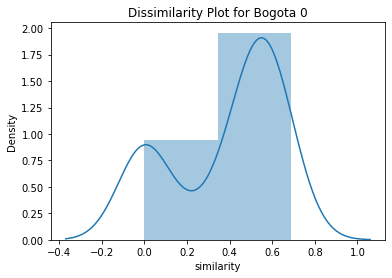

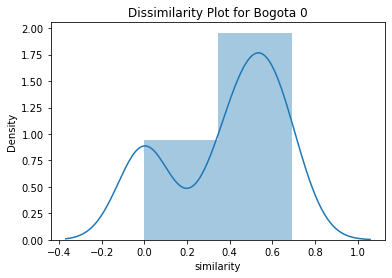

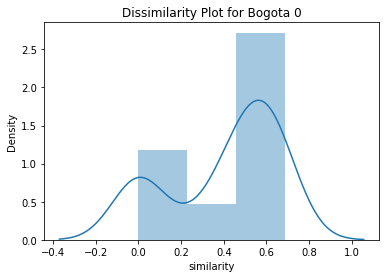

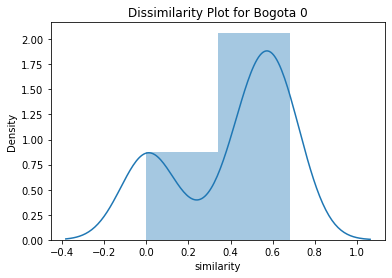

In [35]:
import seaborn as sns 

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity
                                        , stage4_bogota0_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 0")
    sns.distplot((np.log(1-df['similarity']+1)))

>> The plots are not particularly skewed, for bogota 0 ( no transparency ) is a bimodal. We can look at the mean since they are not particularly skewed. 

## Dissimilarity Plot for Bogota 1

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

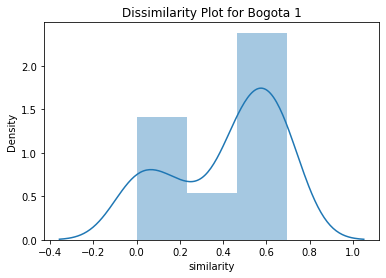

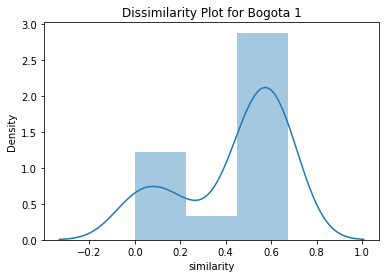

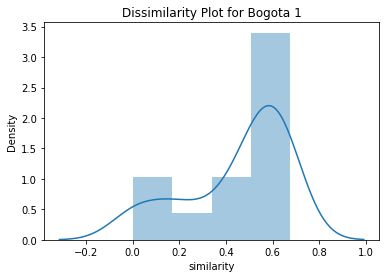

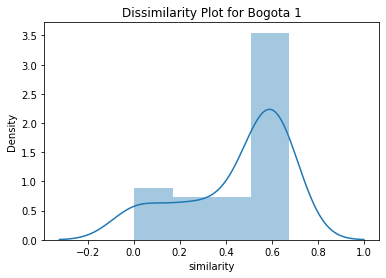

In [36]:
import seaborn as sns 

for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity
                                        , stage4_bogota1_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 1")
    sns.distplot((np.log(1-df['similarity']+1)))

## Dissimilarity Plot for Bogota 2

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

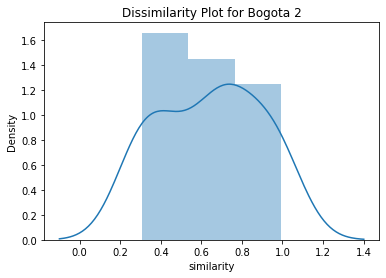

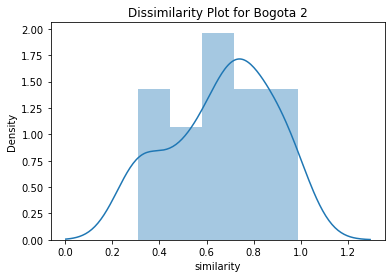

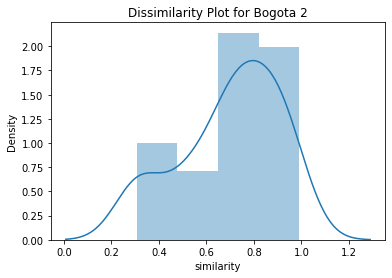

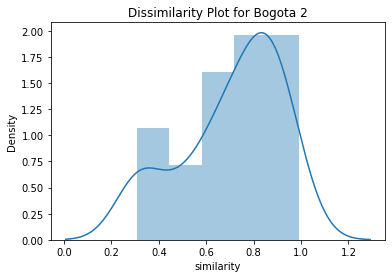

In [37]:
import seaborn as sns 

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity
                                        , stage4_bogota2_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 2")
    sns.distplot((1-np.log(df['similarity']+1)))

## Disimilarity Plot for Bogota 3

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

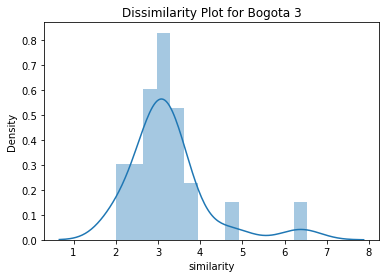

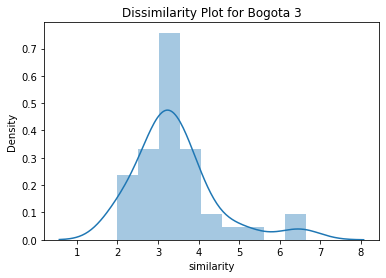

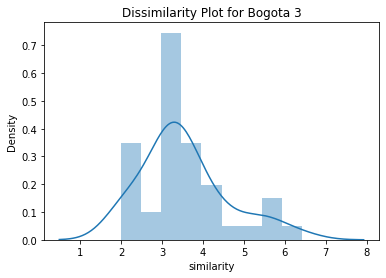

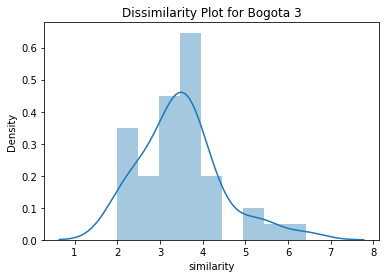

In [38]:
import seaborn as sns 

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity , stage4_bogota3_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 3")
    sns.distplot((1-np.log(df['similarity']))+1)

In [39]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota3.append(median_value)
    mean_log_bogota3.append(mean_value)

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity, stage4_bogota2_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota2.append(median_value)
    mean_log_bogota2.append(mean_value)
    
for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity, stage4_bogota1_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota1.append(median_value)
    mean_log_bogota1.append(mean_value)

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity, stage4_bogota0_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota0.append(median_value)
    mean_log_bogota0.append(mean_value)

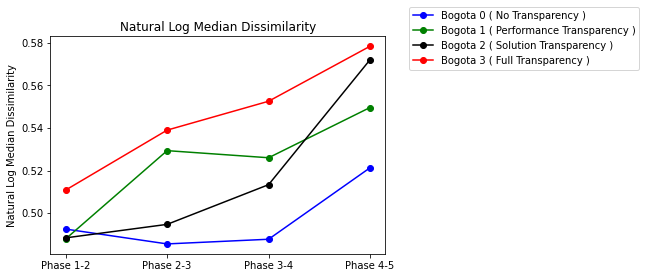

In [40]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Median Dissimilarity")
plt.ylabel("Natural Log Median Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

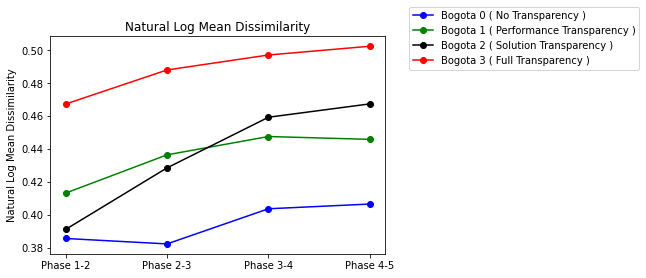

In [41]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Mean Dissimilarity")
plt.ylabel("Natural Log Mean Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

> Without considering the effect of time, bogota 0 is different from bogota 3. Theoretically, transparency will lead to 
convergence from Bodreau and Bernstein paper. The first mechanism is about reuse and cognitive fixation. This mechanism is
explaining what solution transparency does. As a result, we might compare only 2 groups, those with and without solution transparency, and we would find that the 
opposite is through. 

> The second mechanism is social aspirations. March and Shapiro's paper on social aspirations. Brunswicker 2020 also explain that. 
The groups with performance transparency will have reference points that motivate them to jump and innovate if they are below the best. 
As a result, we might also compare those with and without performance transparency. 

> Run a t-test for each plot and phase. 


In [42]:
# T-tests between Bogota 2 and Bogota 1

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity],  [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity]
for x in range(len(list1)):
    for y in range(len(list2)):
        print('---------')
        print(retrieve_name(list1[x]) + ' and ' +retrieve_name(list2[y]) )
        print(ttest_ind(list1[x]['similarity'], list2[y]['similarity']))
        

---------
stage1_bogota2_high_similarity and stage1_bogota1_high_similarity
Ttest_indResult(statistic=0.31741136067423903, pvalue=0.7520520795909207)
---------
stage1_bogota2_high_similarity and stage2_bogota1_high_similarity
Ttest_indResult(statistic=0.6570582993784697, pvalue=0.5136984595059626)
---------
stage1_bogota2_high_similarity and stage3_bogota1_high_similarity
Ttest_indResult(statistic=0.8277885455984658, pvalue=0.4111261149119657)
---------
stage1_bogota2_high_similarity and stage4_bogota1_high_similarity
Ttest_indResult(statistic=0.807062221735785, pvalue=0.4228722635718515)
---------
stage2_bogota2_high_similarity and stage1_bogota1_high_similarity
Ttest_indResult(statistic=-0.1994930396916162, pvalue=0.8423896765648505)
---------
stage2_bogota2_high_similarity and stage2_bogota1_high_similarity
Ttest_indResult(statistic=0.20990524413044218, pvalue=0.8342820272346573)
---------
stage2_bogota2_high_similarity and stage3_bogota1_high_similarity
Ttest_indResult(statistic=0.

In [43]:
# T-tests between Bogota 3 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
for x in range(len(list1)):
    for y in range(len(list2)):
        print('---------')
        print(retrieve_name(list1[x]) + ' and ' +retrieve_name(list2[y]) )
        print(ttest_ind(list1[x]['similarity'], list2[y]['similarity']))

---------
stage1_bogota3_high_similarity and stage1_bogota0_high_similarity
Ttest_indResult(statistic=-1.5253737133745138, pvalue=0.13131681272417756)
---------
stage1_bogota3_high_similarity and stage2_bogota0_high_similarity
Ttest_indResult(statistic=-1.5978498690657321, pvalue=0.11422608798252043)
---------
stage1_bogota3_high_similarity and stage3_bogota0_high_similarity
Ttest_indResult(statistic=-1.109954414893396, pvalue=0.27051831223336265)
---------
stage1_bogota3_high_similarity and ___
Ttest_indResult(statistic=-0.9783020750773634, pvalue=0.3310288440433563)
---------
stage2_bogota3_high_similarity and stage1_bogota0_high_similarity
Ttest_indResult(statistic=-2.010062353490981, pvalue=0.04797354012427207)
---------
stage2_bogota3_high_similarity and stage2_bogota0_high_similarity
Ttest_indResult(statistic=-2.0802187273340853, pvalue=0.040876396051113685)
---------
stage2_bogota3_high_similarity and stage3_bogota0_high_similarity
Ttest_indResult(statistic=-1.5989552587839257, 